In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
PATH = r'C:\Users\latee\Downloads\league-of-legends-diamond-ranked-games-10-min\high_diamond_ranked_10min.csv'
df = pd.read_csv(PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [4]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [5]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
df.columns = map(lambda x:x.lower(), df.columns)

In [7]:
# Grabbing Unique Id's 
gameid = df['gameid']

# Dropping them for now 
df = df.drop(['gameid'], axis = 1)

In [8]:
df['bluewins'].value_counts()

0    4949
1    4930
Name: bluewins, dtype: int64

In [9]:
# Creating 2 dfs based on which team won the match
blue_mask = df['bluewins'] == 1
red_mask = df['bluewins'] == 0

In [10]:
blue = df[blue_mask]
red = df[red_mask]

In [11]:
blue.columns

Index(['bluewins', 'bluewardsplaced', 'bluewardsdestroyed', 'bluefirstblood',
       'bluekills', 'bluedeaths', 'blueassists', 'blueelitemonsters',
       'bluedragons', 'blueheralds', 'bluetowersdestroyed', 'bluetotalgold',
       'blueavglevel', 'bluetotalexperience', 'bluetotalminionskilled',
       'bluetotaljungleminionskilled', 'bluegolddiff', 'blueexperiencediff',
       'bluecspermin', 'bluegoldpermin', 'redwardsplaced', 'redwardsdestroyed',
       'redfirstblood', 'redkills', 'reddeaths', 'redassists',
       'redelitemonsters', 'reddragons', 'redheralds', 'redtowersdestroyed',
       'redtotalgold', 'redavglevel', 'redtotalexperience',
       'redtotalminionskilled', 'redtotaljungleminionskilled', 'redgolddiff',
       'redexperiencediff', 'redcspermin', 'redgoldpermin'],
      dtype='object')

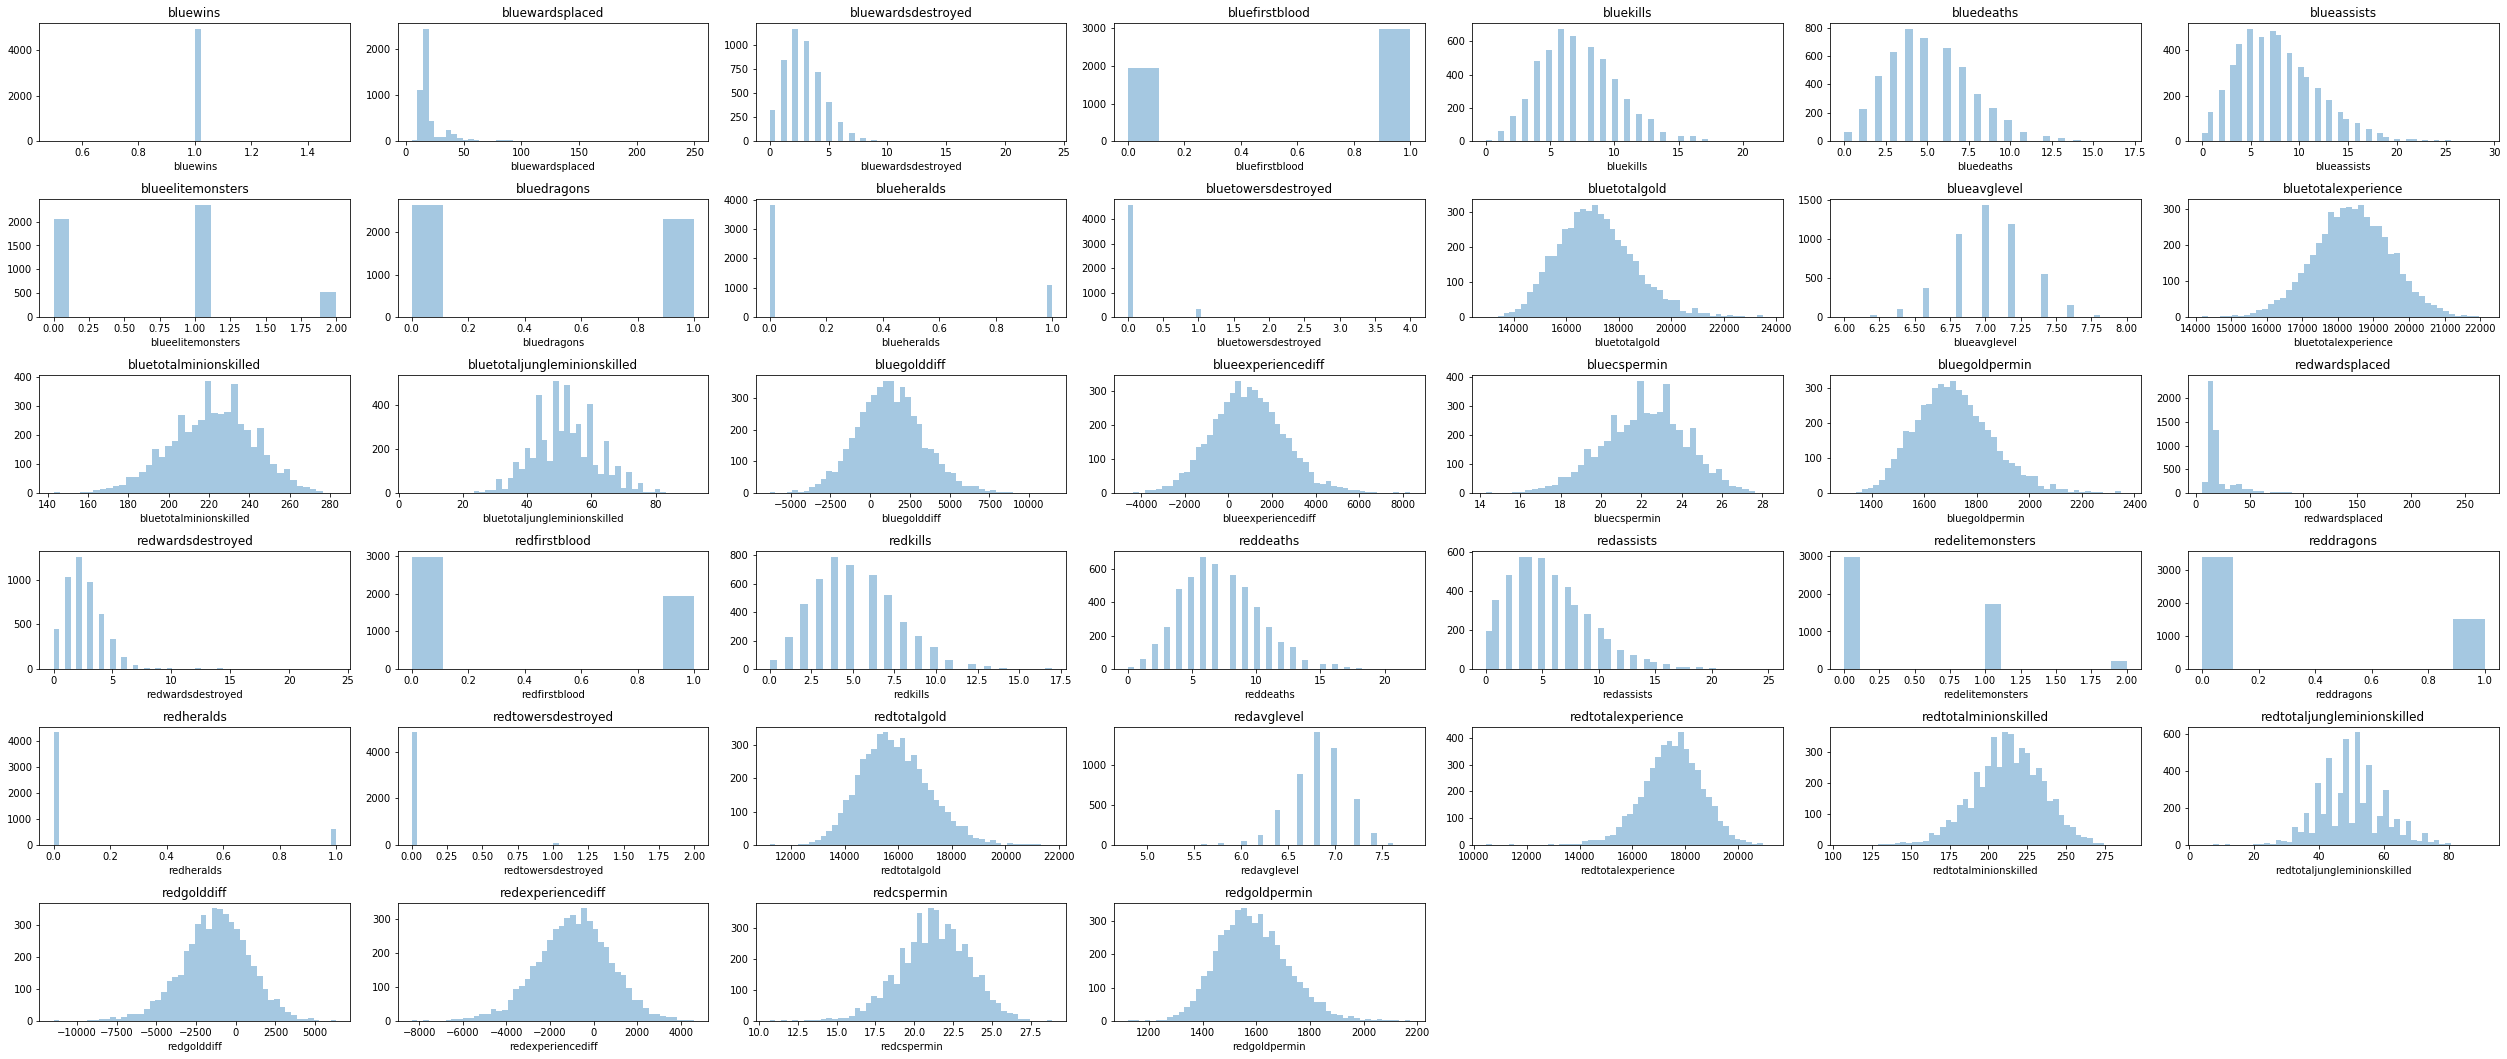

In [12]:
# Plotting Blue Team Win Distributions
numeric_columns = blue.select_dtypes(['int64', 'float64']).columns
FILL_LIST = []
for cols in blue[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)
plt.figure(figsize=(35, 95))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    try:
        plt.subplot(len(FILL_LIST), 7, i+1)
        sns.distplot(blue[col], kde=False)
        plt.title(col)
    except TypeError:
        pass
plt.tight_layout()

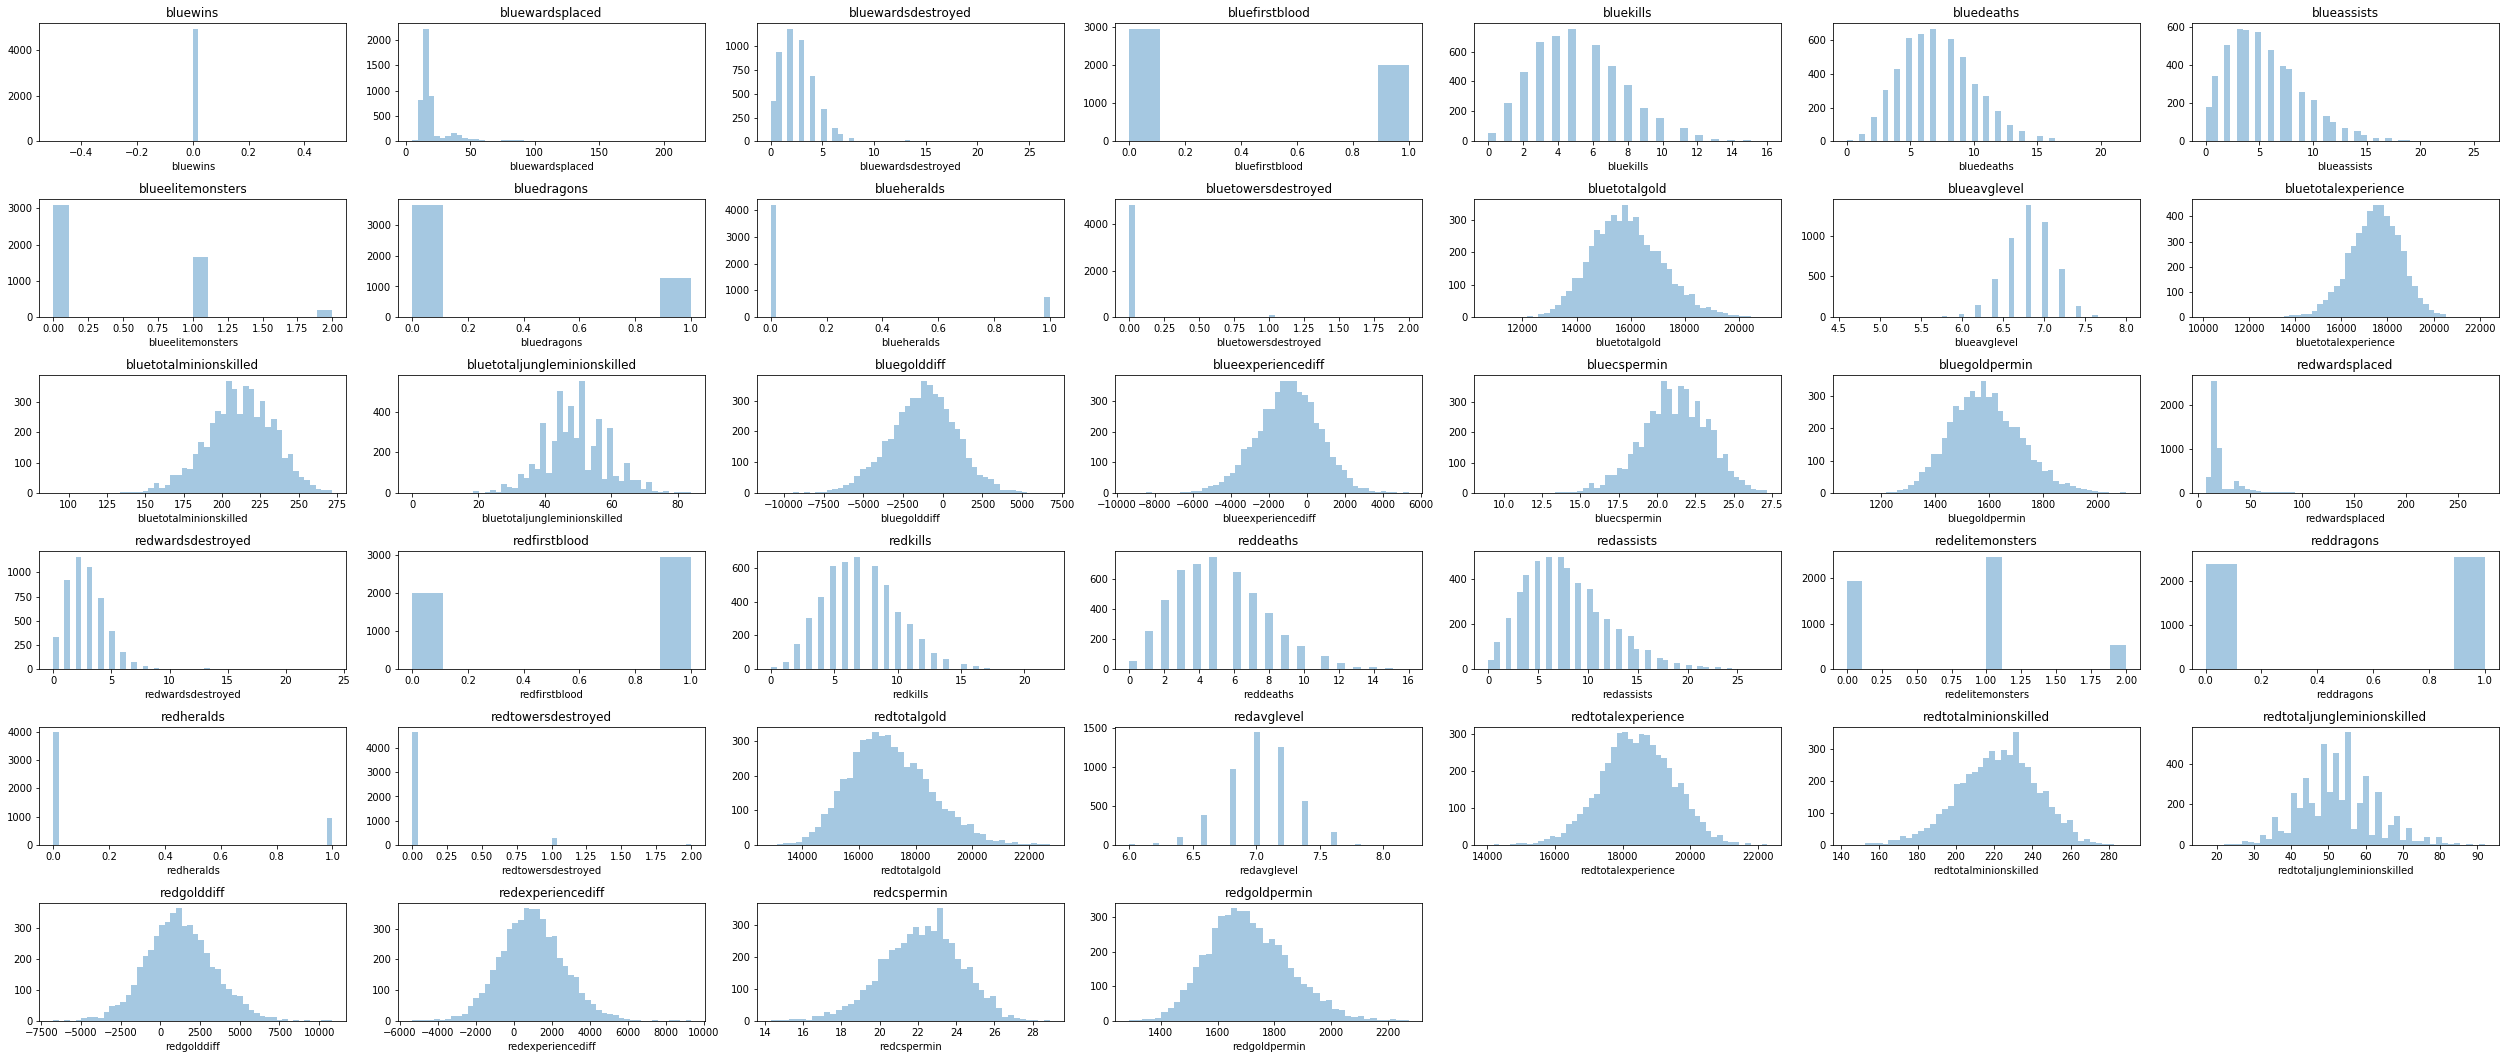

In [13]:
# Plotting Blue Team Win Distributions
numeric_columns = red.select_dtypes(['int64', 'float64']).columns
FILL_LIST = []
for cols in red[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)
plt.figure(figsize=(35, 95))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    try:
        plt.subplot(len(FILL_LIST), 7, i+1)
        sns.distplot(red[col], kde=False)
        plt.title(col)
    except TypeError:
        pass
plt.tight_layout()

In [14]:
# Check the skew of all numerical features
### may need to normalize features before modeling due to the model's sensitivity to outliers
from scipy.stats import skew
skewed_feats = blue[numeric_columns].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
redtowersdestroyed,7.957879
redwardsplaced,4.649673
bluetowersdestroyed,4.600474
bluewardsplaced,4.287780
redwardsdestroyed,3.070494
bluewardsdestroyed,2.525388
redheralds,2.276930
blueheralds,1.323037
redelitemonsters,0.928331
redassists,0.883318


#### Supervised Dimensionality Reduction 

Breaking Features into groups:

'redwardsplaced',
'redwardsdestroyed',
'redtowersdestroyed',
'redtotalgold',
'redavglevel',
'redtotalexperience',
'redgolddiff',
'redcspermin',
'redgoldpermin'


'redfirstblood',
'redkills',
'reddeaths',
'redassists',
'redelitemonsters',
'reddragons',
'redheralds',
'redtotalminionskilled',
'redtotaljungleminionskilled'

note: Repeat everything again for red

In [15]:
blue_pro = df.loc[:, ['bluewins', 'bluewardsplaced', 'bluewardsdestroyed', 'bluetowersdestroyed', 'bluetotalgold',
                      'blueavglevel', 'bluetotalexperience', 'bluegolddiff', 'bluecspermin', 'bluegoldpermin']]

blue_kill = df.loc[:, ['bluewins', 'bluefirstblood', 'bluekills', 'bluedeaths', 'blueassists', 'blueelitemonsters',
                       'bluedragons', 'blueheralds', 'bluetotalminionskilled', 'bluetotaljungleminionskilled']]

red_pro = df.loc[:, ['bluewins', 'redwardsplaced', 'redwardsdestroyed', 'redtowersdestroyed', 'redtotalgold',
                     'redavglevel', 'redtotalexperience', 'redgolddiff', 'redcspermin', 'redgoldpermin']]

red_kill = df.loc[:, ['bluewins', 'redfirstblood', 'redkills', 'reddeaths', 'redassists', 'redelitemonsters',
                      'reddragons', 'redheralds', 'redtotalminionskilled', 'redtotaljungleminionskilled']]

# Correlation of Blue Team's Proformance to Winning

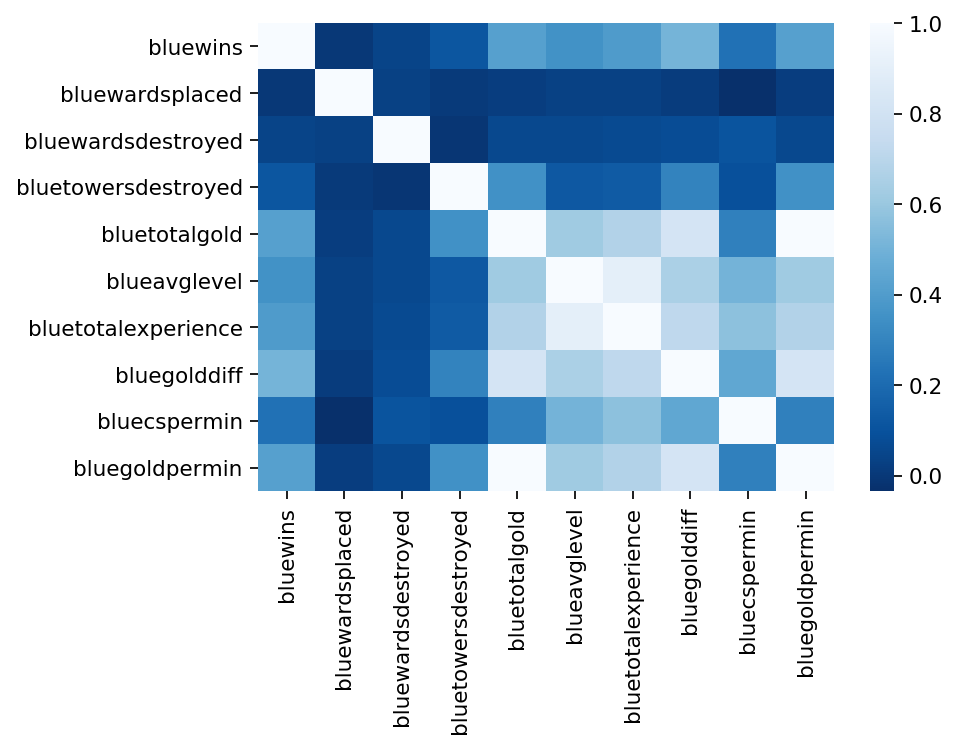

In [16]:
mask = np.zeros_like(blue_pro.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(dpi=155)
sns.heatmap(blue_pro.corr(), cmap='Blues_r')

In [17]:
blue_pro.corr()

,bluewins,bluewardsplaced,bluewardsdestroyed,bluetowersdestroyed,bluetotalgold,blueavglevel,bluetotalexperience,bluegolddiff,bluecspermin,bluegoldpermin
bluewins,1.000000,0.000087,0.044247,0.115566,0.417213,0.357820,0.396141,0.511119,0.224909,0.417213
bluewardsplaced,0.000087,1.000000,0.034447,0.009462,0.019725,0.034349,0.031719,0.015800,-0.033925,0.019725
bluewardsdestroyed,0.044247,0.034447,1.000000,-0.009150,0.060054,0.060294,0.067462,0.078585,0.111028,0.060054
bluetowersdestroyed,0.115566,0.009462,-0.009150,1.000000,0.350941,0.124453,0.139398,0.294060,0.092291,0.350941
bluetotalgold,0.417213,0.019725,0.060054,0.350941,1.000000,0.616968,0.676193,0.816803,0.284902,1.000000
blueavglevel,0.357820,0.034349,0.060294,0.124453,0.616968,1.000000,0.901297,0.653538,0.506279,0.616968
bluetotalexperience,0.396141,0.031719,0.067462,0.139398,0.676193,0.901297,1.000000,0.717968,0.570850,0.676193
bluegolddiff,0.511119,0.015800,0.078585,0.294060,0.816803,0.653538,0.717968,1.000000,0.450497,0.816803
bluecspermin,0.224909,-0.033925,0.111028,0.092291,0.284902,0.506279,0.570850,0.450497,1.000000,0.284902
bluegoldpermin,0.417213,0.019725,0.060054,0.350941,1.000000,0.616968,0.676193,0.816803,0.284902,1.000000


# Correlation of Blue Team's Kills to Winning

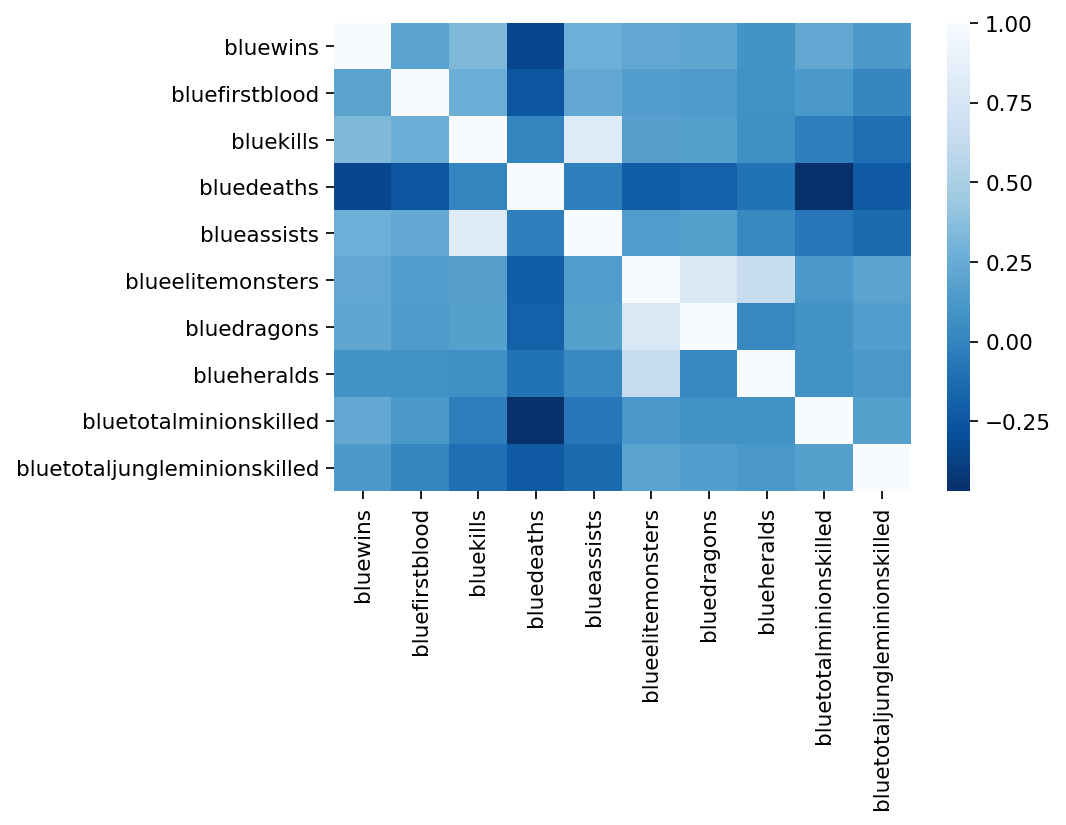

In [18]:
mask = np.zeros_like(blue_kill.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(dpi=155)
sns.heatmap(blue_kill.corr(), cmap='Blues_r')

In [19]:
blue_kill.corr()

,bluewins,bluefirstblood,bluekills,bluedeaths,blueassists,blueelitemonsters,bluedragons,blueheralds,bluetotalminionskilled,bluetotaljungleminionskilled
bluewins,1.000000,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.224909,0.131445
bluefirstblood,0.201769,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.125642,0.018190
bluekills,0.337358,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,-0.030880,-0.112506
bluedeaths,-0.339297,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.468560,-0.228102
blueassists,0.276685,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,-0.062035,-0.134023
blueelitemonsters,0.221944,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.118762,0.198378
bluedragons,0.213768,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,0.086686,0.159595
blueheralds,0.092385,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,0.083509,0.121291
bluetotalminionskilled,0.224909,0.125642,-0.030880,-0.468560,-0.062035,0.118762,0.086686,0.083509,1.000000,0.172282
bluetotaljungleminionskilled,0.131445,0.018190,-0.112506,-0.228102,-0.134023,0.198378,0.159595,0.121291,0.172282,1.000000


# Correlation of Red Team's Performance to Blue Team Winning

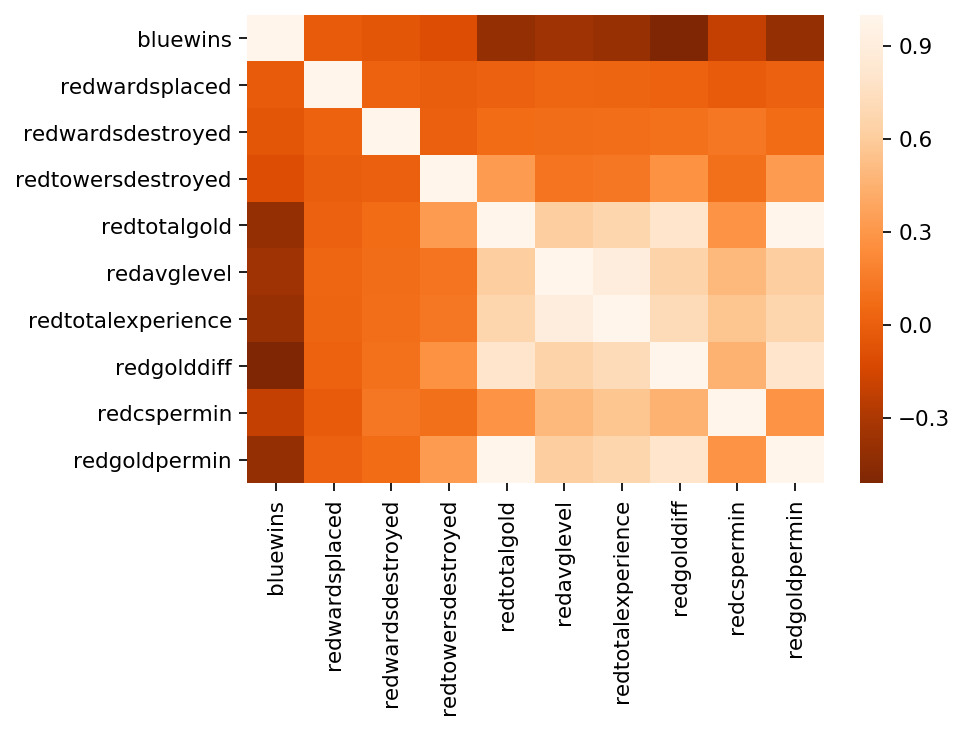

In [20]:
mask = np.zeros_like(red_pro.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(dpi=155)
sns.heatmap(red_pro.corr(), cmap='Oranges_r')

In [21]:
red_pro.corr()

,bluewins,redwardsplaced,redwardsdestroyed,redtowersdestroyed,redtotalgold,redavglevel,redtotalexperience,redgolddiff,redcspermin,redgoldpermin
bluewins,1.000000,-0.023671,-0.055400,-0.103696,-0.411396,-0.352127,-0.387588,-0.511119,-0.212171,-0.411396
redwardsplaced,-0.023671,1.000000,0.019784,-0.006230,0.010666,0.041737,0.036506,0.019042,-0.021842,0.010666
redwardsdestroyed,-0.055400,0.019784,1.000000,0.003855,0.070784,0.075537,0.079975,0.099725,0.128062,0.070784
redtowersdestroyed,-0.103696,-0.006230,0.003855,1.000000,0.327503,0.113035,0.129002,0.273861,0.092564,0.327503
redtotalgold,-0.411396,0.010666,0.070784,0.327503,1.000000,0.614025,0.669646,0.804347,0.278715,1.000000
redavglevel,-0.352127,0.041737,0.075537,0.113035,0.614025,1.000000,0.901748,0.652929,0.489672,0.614025
redtotalexperience,-0.387588,0.036506,0.079975,0.129002,0.669646,0.901748,1.000000,0.714405,0.558985,0.669646
redgolddiff,-0.511119,0.019042,0.099725,0.273861,0.804347,0.652929,0.714405,1.000000,0.452633,0.804347
redcspermin,-0.212171,-0.021842,0.128062,0.092564,0.278715,0.489672,0.558985,0.452633,1.000000,0.278715
redgoldpermin,-0.411396,0.010666,0.070784,0.327503,1.000000,0.614025,0.669646,0.804347,0.278715,1.000000


# Correlation of Red Team's Kills to Blue Team Winning

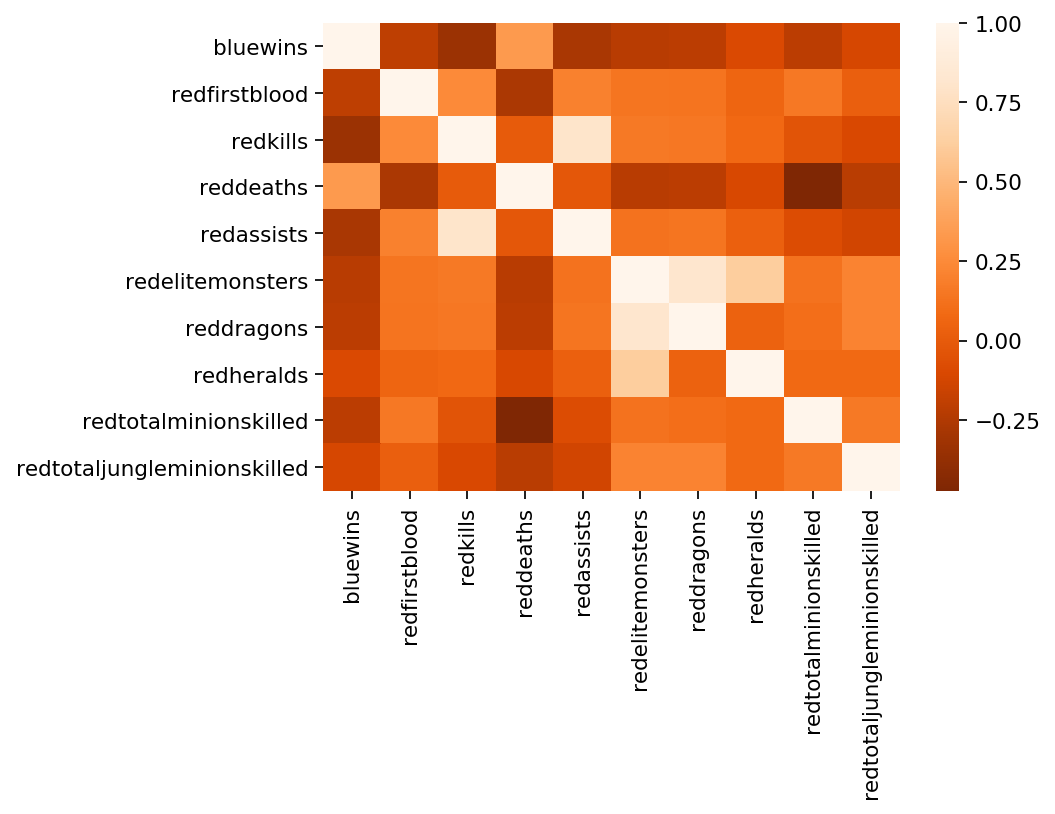

In [54]:
mask = np.zeros_like(red_kill.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(dpi=155)
sns.heatmap(red_kill.corr(), cmap='Oranges_r')

In [23]:
red_kill.corr()

,bluewins,redfirstblood,redkills,reddeaths,redassists,redelitemonsters,reddragons,redheralds,redtotalminionskilled,redtotaljungleminionskilled
bluewins,1.000000,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.212171,-0.110994
redfirstblood,-0.201769,1.000000,0.247929,-0.269425,0.201140,0.141627,0.135327,0.060246,0.156711,0.024559
redkills,-0.339297,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,-0.040521,-0.100271
reddeaths,0.337358,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.472203,-0.214454
redassists,-0.271047,0.201140,0.804023,-0.020344,1.000000,0.129698,0.142671,0.030000,-0.078234,-0.130417
redelitemonsters,-0.221551,0.141627,0.163340,-0.224564,0.129698,1.000000,0.811234,0.619153,0.129705,0.216969
reddragons,-0.209516,0.135327,0.150746,-0.207949,0.142671,0.811234,1.000000,0.043114,0.103151,0.214187
redheralds,-0.097172,0.060246,0.076639,-0.104423,0.030000,0.619153,0.043114,1.000000,0.083087,0.083068
redtotalminionskilled,-0.212171,0.156711,-0.040521,-0.472203,-0.078234,0.129705,0.103151,0.083087,1.000000,0.165652
redtotaljungleminionskilled,-0.110994,0.024559,-0.100271,-0.214454,-0.130417,0.216969,0.214187,0.083068,0.165652,1.000000


Given that League is a competitive 2 team game and we have similar sets of features for both team, we can generate a lot of comparative features that are implict from the orginal dataset. 

In [24]:
dfvs = df.copy()

dfvs['bcs_diff'] = df['bluecspermin'] - df['redcspermin']
dfvs['btotexp_diff'] = df['bluetotalexperience'] - df['redtotalexperience']
dfvs['bavglvl_diff'] = df['blueavglevel'] - df['redavglevel']
dfvs['bwardsplaced_diff'] = df['bluewardsplaced'] - df['redwardsplaced']
dfvs['bwardsdestroyed_diff'] = df['bluewardsdestroyed'] - df['redwardsdestroyed']
dfvs['btowerdeaths_diff'] = df['bluetowersdestroyed'] - df['redtowersdestroyed']

dfvs['bkills_diff'] = df['bluekills'] - df['redkills']
dfvs['bdeaths_diff'] = df['bluedeaths'] - df['reddeaths']
dfvs['belite_diff'] = df['blueelitemonsters'] - df['redelitemonsters']
dfvs['bdrag_diff'] = df['bluedragons'] - df['reddragons']
dfvs['bheralds_diff'] = df['blueheralds'] - df['redheralds']
dfvs['btotminions_diff'] = df['bluetotalminionskilled'] - df['redtotalminionskilled']
dfvs['bjgmionions_diff'] = df['bluetotaljungleminionskilled'] - df['redtotaljungleminionskilled']

In [25]:
vs_pro = dfvs.loc[:, ['bluewins', 'bcs_diff', 'btotexp_diff', 'bavglvl_diff', 'bwardsplaced_diff', 'bwardsdestroyed_diff', 'btowerdeaths_diff']]
vs_kill = dfvs.loc[:, ['bluewins', 'bkills_diff', 'bdeaths_diff', 'belite_diff', 'bdrag_diff', 'bheralds_diff', 'btotminions_diff', 'bjgmionions_diff']]

# 

In [26]:
vs_pro.corr()

,bluewins,bcs_diff,btotexp_diff,bavglvl_diff,bwardsplaced_diff,bwardsdestroyed_diff,btowerdeaths_diff
bluewins,1.000000,0.309126,0.489558,0.452927,0.016890,0.075205,0.156179
bcs_diff,0.309126,1.000000,0.625556,0.569276,-0.028676,0.090088,0.261224
btotexp_diff,0.489558,0.625556,1.000000,0.919161,0.038276,0.123670,0.296233
bavglvl_diff,0.452927,0.569276,0.919161,1.000000,0.037614,0.119340,0.283992
bwardsplaced_diff,0.016890,-0.028676,0.038276,0.037614,1.000000,-0.104968,0.003837
bwardsdestroyed_diff,0.075205,0.090088,0.123670,0.119340,-0.104968,1.000000,0.030626
btowerdeaths_diff,0.156179,0.261224,0.296233,0.283992,0.003837,0.030626,1.000000


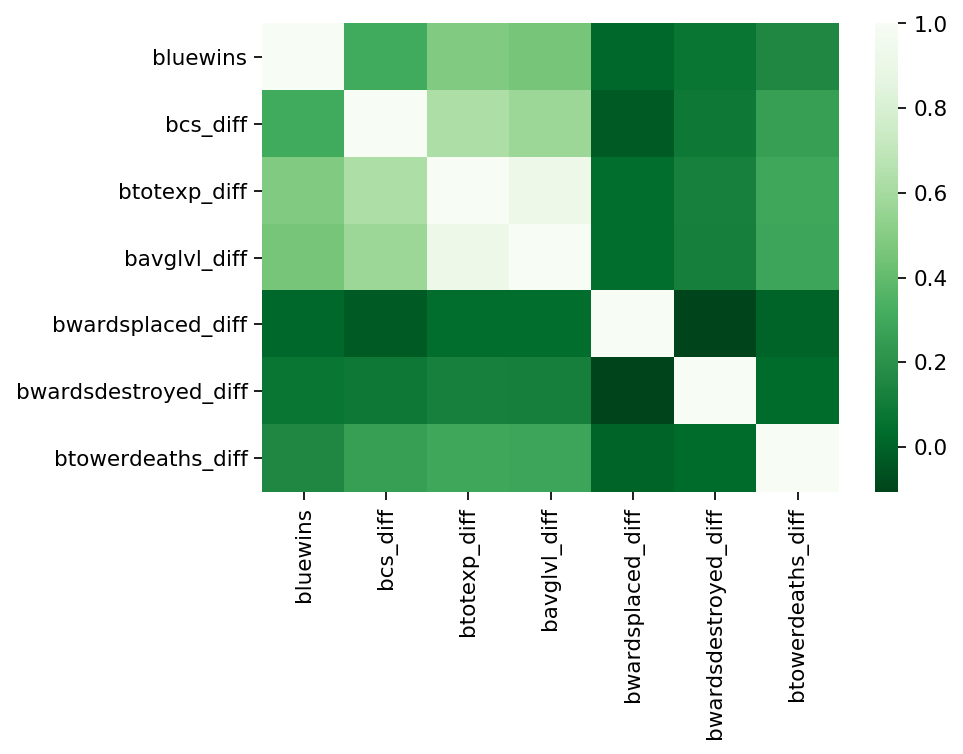

In [27]:
mask = np.zeros_like(vs_pro.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(dpi=155)
sns.heatmap(vs_pro.corr(), cmap='Greens_r')

In [28]:
vs_kill.corr()

,bluewins,bkills_diff,bdeaths_diff,belite_diff,bdrag_diff,bheralds_diff,btotminions_diff,bjgmionions_diff
bluewins,1.000000,0.479379,-0.479379,0.259969,0.234264,0.121713,0.309126,0.169118
bkills_diff,0.479379,1.000000,-1.000000,0.320472,0.281758,0.160520,0.435721,0.113480
bdeaths_diff,-0.479379,-1.000000,1.000000,-0.320472,-0.281758,-0.160520,-0.435721,-0.113480
belite_diff,0.259969,0.320472,-0.320472,1.000000,0.834045,0.568232,0.163066,0.236691
bdrag_diff,0.234264,0.281758,-0.281758,0.834045,1.000000,0.019957,0.118916,0.203324
bheralds_diff,0.121713,0.160520,-0.160520,0.568232,0.019957,1.000000,0.118146,0.125674
btotminions_diff,0.309126,0.435721,-0.435721,0.163066,0.118916,0.118146,1.000000,0.067111
bjgmionions_diff,0.169118,0.113480,-0.113480,0.236691,0.203324,0.125674,0.067111,1.000000


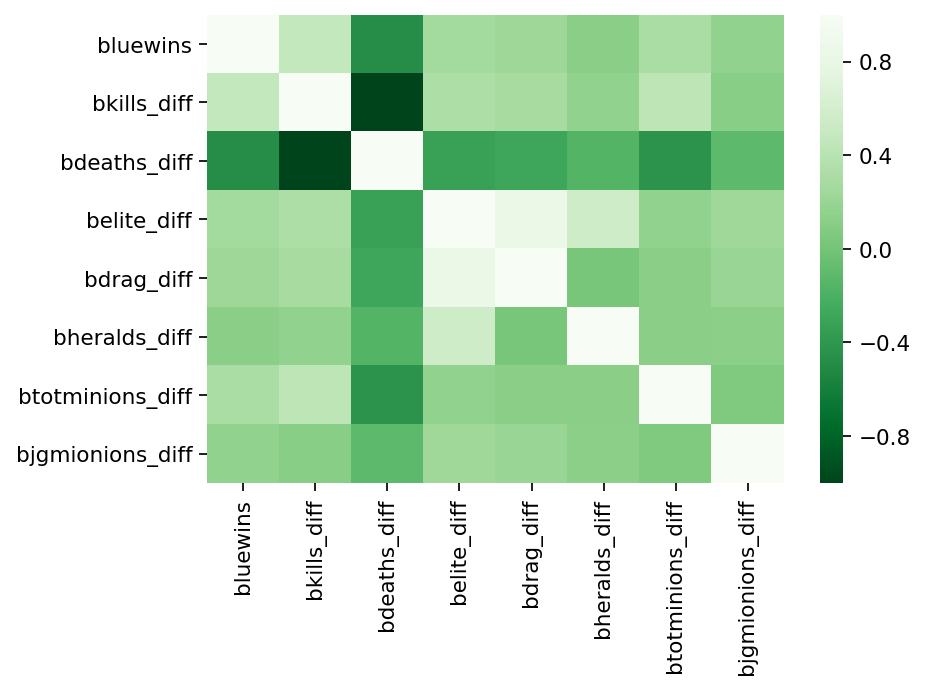

In [29]:
mask = np.zeros_like(vs_kill.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(dpi=155)
sns.heatmap(vs_kill.corr(), cmap='Greens_r')

feature list at 40%

group1 
'bluetotalgold',
'bluegolddiff',
'bluegoldpermin',
'bluetotalexperience',

group 3 
'redtotalgold',
'redgolddiff',
'redgoldpermin',

group 5
'btotexp_diff',
'bavglvl_diff',

group 6
bkills_diff


# Dataset of features correlated with the target 

In [30]:
df_feats = dfvs.loc[:, ['bluewins',
                        'bluetotalgold',
                        'bluegolddiff',
                        'bluegoldpermin',
                        'bluetotalexperience',
                        'redtotalgold',
                        'redgolddiff',
                        'redgoldpermin',
                        'btotexp_diff',
                        'bavglvl_diff',
                        'bkills_diff'
                        ]]

In [31]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 11 columns):
bluewins               9879 non-null int64
bluetotalgold          9879 non-null int64
bluegolddiff           9879 non-null int64
bluegoldpermin         9879 non-null float64
bluetotalexperience    9879 non-null int64
redtotalgold           9879 non-null int64
redgolddiff            9879 non-null int64
redgoldpermin          9879 non-null float64
btotexp_diff           9879 non-null int64
bavglvl_diff           9879 non-null float64
bkills_diff            9879 non-null int64
dtypes: float64(3), int64(8)
memory usage: 849.1 KB


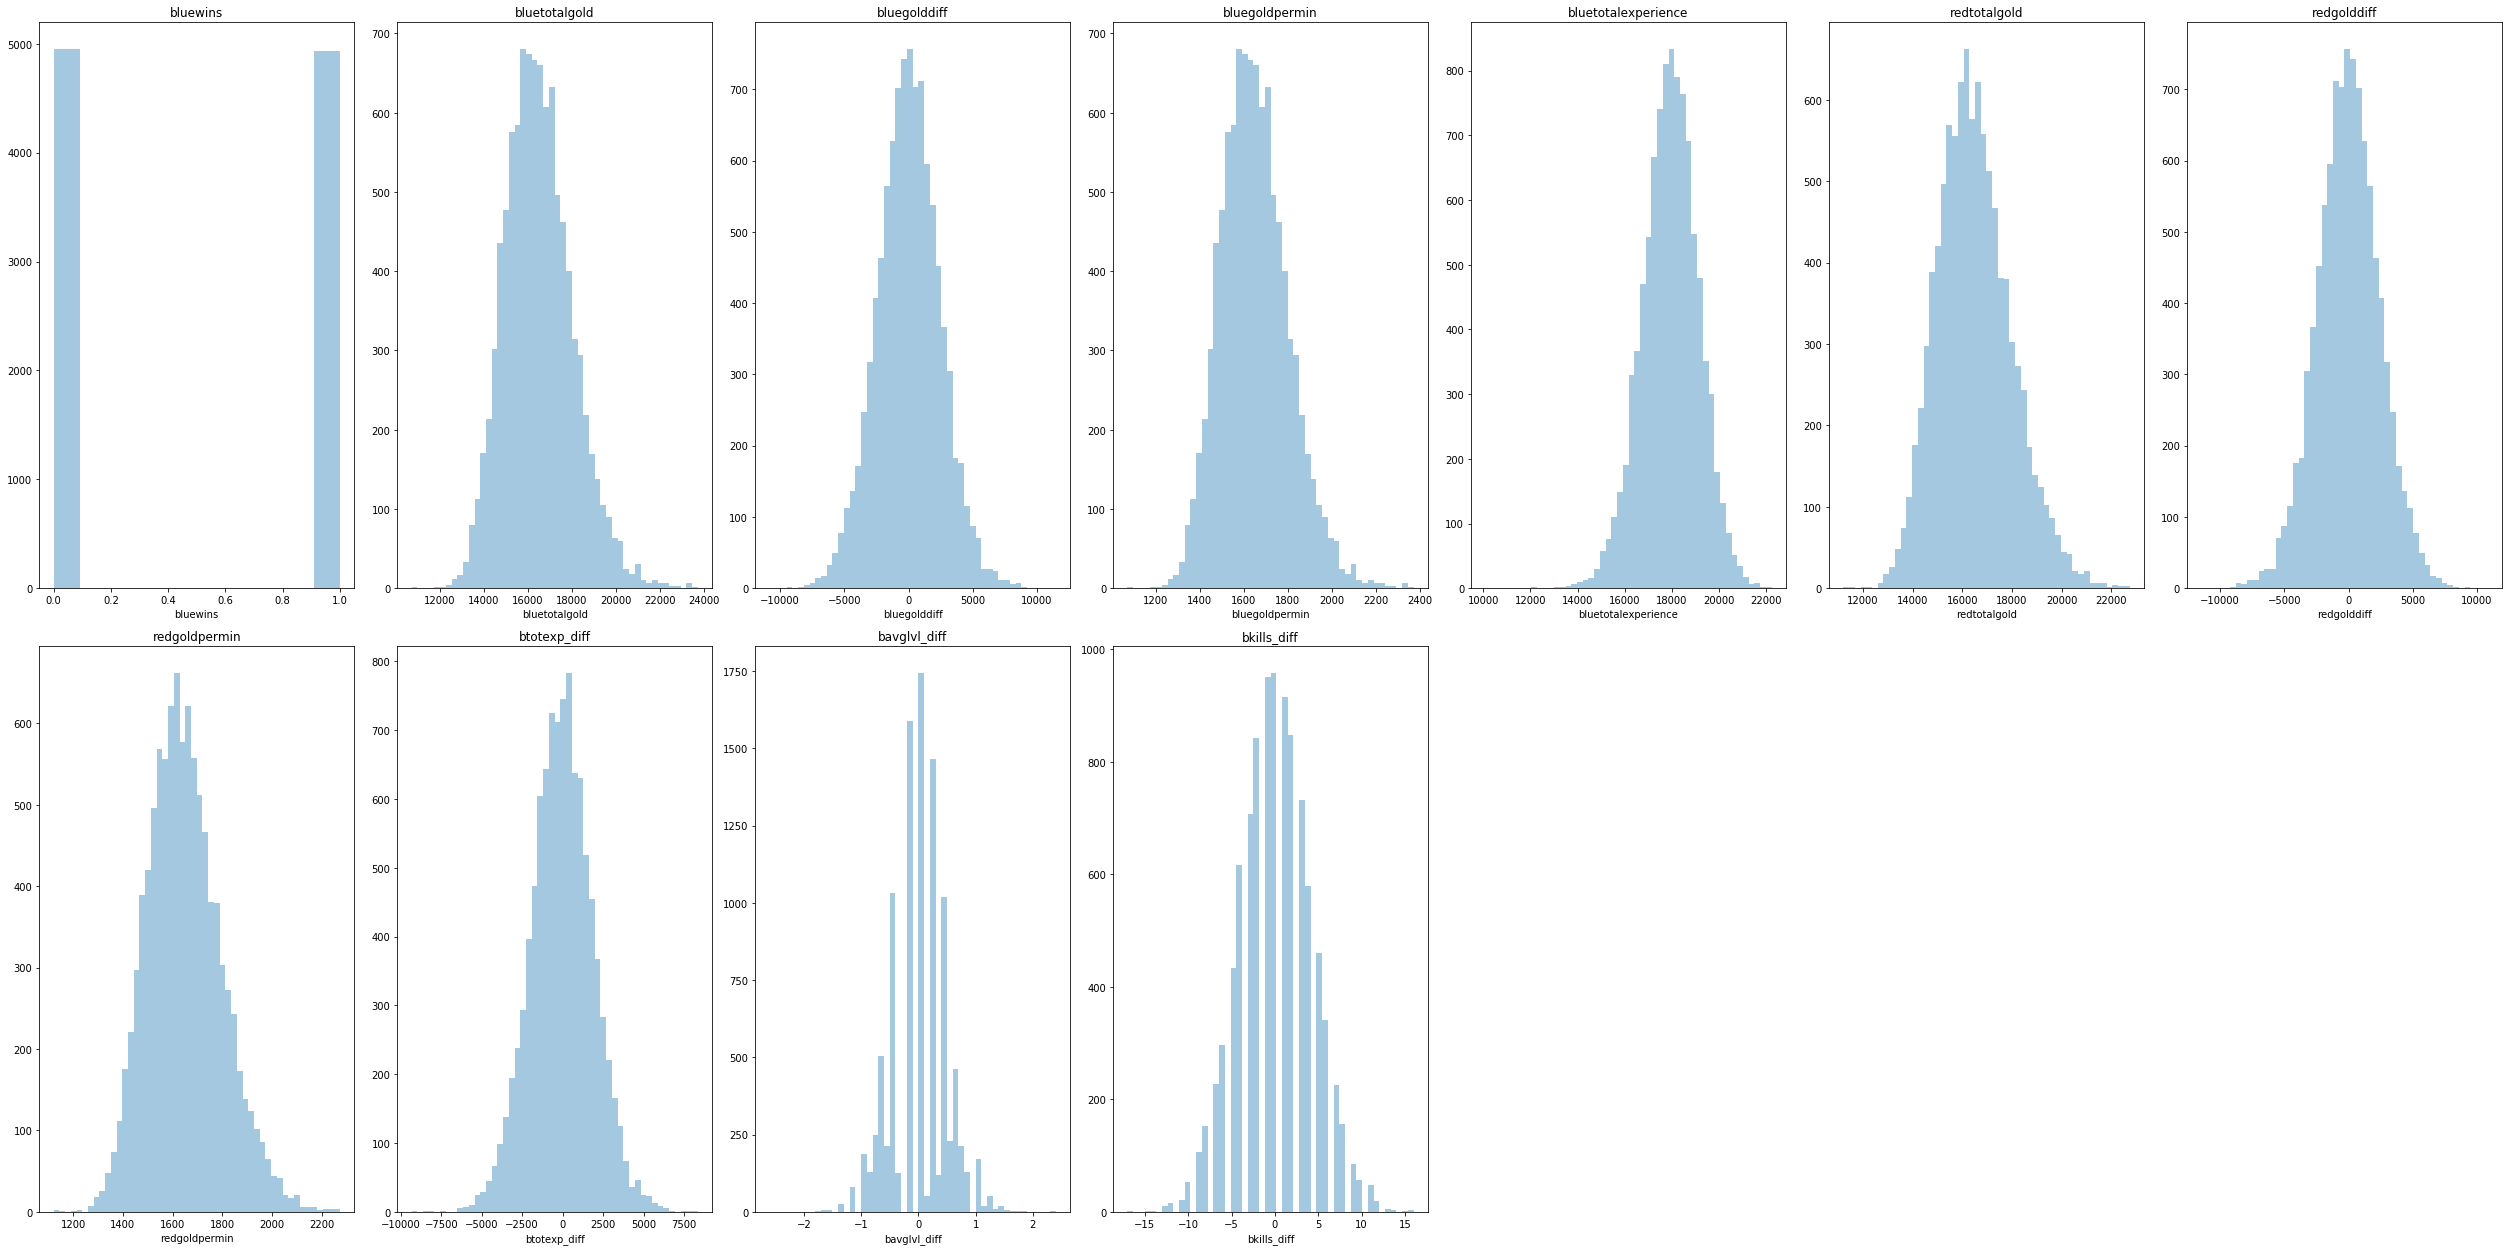

In [32]:
# Plotting feat Distributions
numeric_columns = df_feats.select_dtypes(['int64', 'float64']).columns
FILL_LIST = []
for cols in df_feats[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)
plt.figure(figsize=(35, 95))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    try:
        plt.subplot(len(FILL_LIST), 7, i+1)
        sns.distplot(df_feats[col], kde=False)
        plt.title(col)
    except TypeError:
        pass
plt.tight_layout()

# Before going any further, we have to remove variables that contain the same information about the variance in the target. 

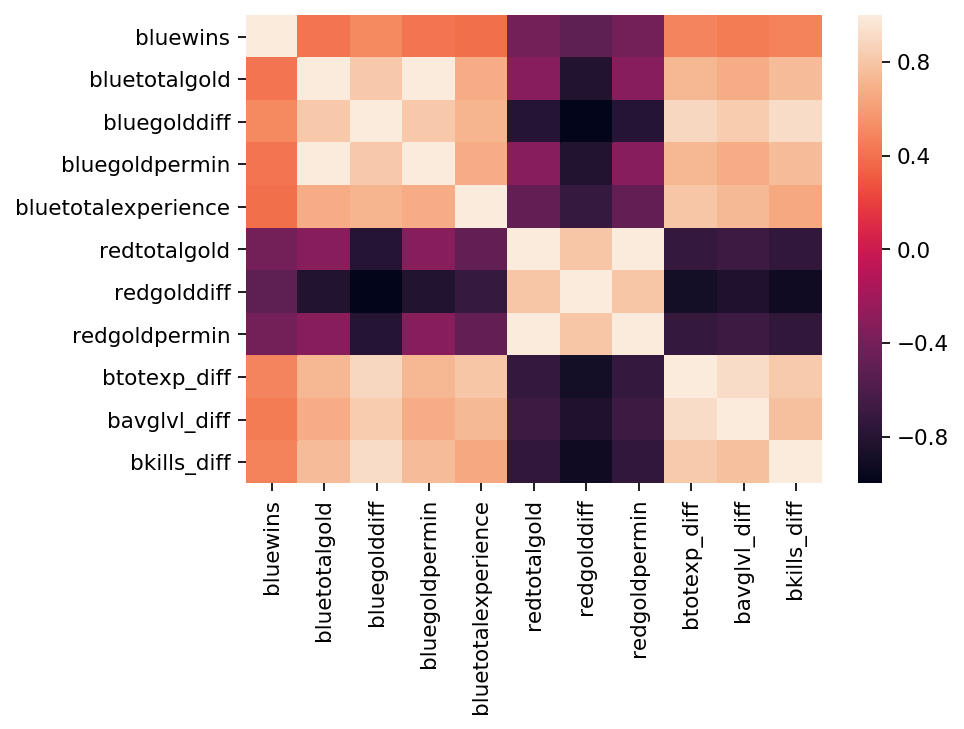

In [55]:
plt.figure(dpi=155)
sns.heatmap(df_feats.corr())

In [56]:
df_feats.corr()

,bluewins,bluetotalgold,bluegolddiff,bluegoldpermin,bluetotalexperience,redtotalgold,redgolddiff,redgoldpermin,btotexp_diff,bavglvl_diff,bkills_diff
bluewins,1.000000,0.417213,0.511119,0.417213,0.396141,-0.411396,-0.511119,-0.411396,0.489558,0.452927,0.479379
bluetotalgold,0.417213,1.000000,0.816803,1.000000,0.676193,-0.314212,-0.816803,-0.314212,0.729345,0.678786,0.751524
bluegolddiff,0.511119,0.816803,1.000000,0.816803,0.717968,-0.804347,-1.000000,-0.804347,0.894729,0.833493,0.917008
bluegoldpermin,0.417213,1.000000,0.816803,1.000000,0.676193,-0.314212,-0.816803,-0.314212,0.729345,0.678786,0.751524
bluetotalexperience,0.396141,0.676193,0.717968,0.676193,1.000000,-0.485059,-0.717968,-0.485059,0.800815,0.737262,0.660611
redtotalgold,-0.411396,-0.314212,-0.804347,-0.314212,-0.485059,1.000000,0.804347,1.000000,-0.721190,-0.672491,-0.735009
redgolddiff,-0.511119,-0.816803,-1.000000,-0.816803,-0.717968,0.804347,1.000000,0.804347,-0.894729,-0.833493,-0.917008
redgoldpermin,-0.411396,-0.314212,-0.804347,-0.314212,-0.485059,1.000000,0.804347,1.000000,-0.721190,-0.672491,-0.735009
btotexp_diff,0.489558,0.729345,0.894729,0.729345,0.800815,-0.721190,-0.894729,-0.721190,1.000000,0.919161,0.822845
bavglvl_diff,0.452927,0.678786,0.833493,0.678786,0.737262,-0.672491,-0.833493,-0.672491,0.919161,1.000000,0.766222


### My largest concern here is that a lot of the features are highly correlated with each other. 

For that reason I am only going to grab 2 features and our target for modeling. 

bluewins

bluetotalgold

redtotalgold

In [97]:
df_feats1 = df_feats.loc[:, ['bluewins', 'bluetotalgold', 'redtotalgold']]

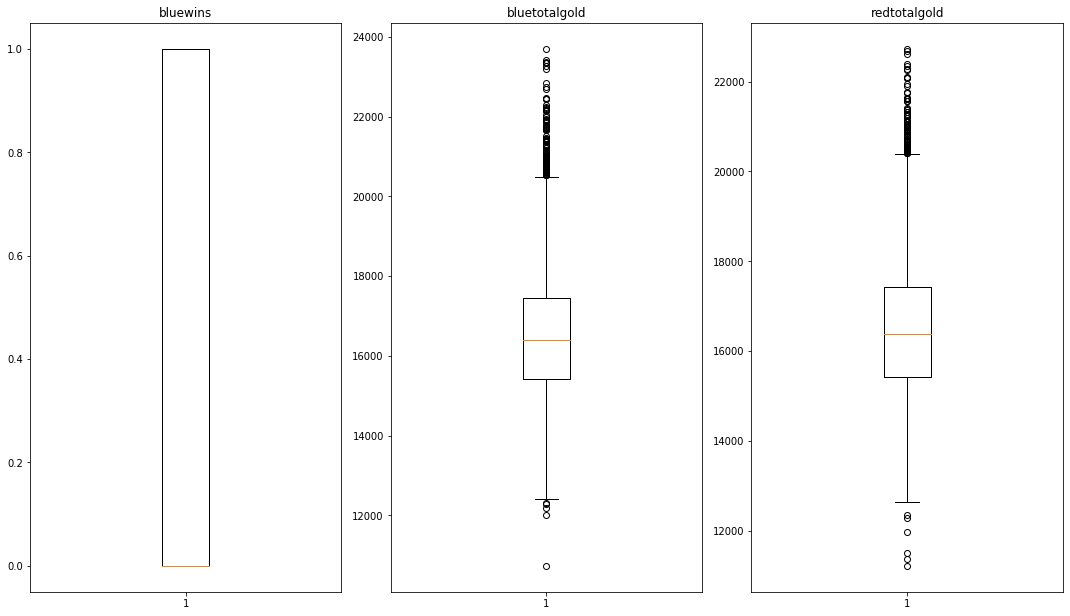

In [98]:
# Plotting feat Distributions
numeric_columns = df_feats1.select_dtypes(['int64', 'float64']).columns
FILL_LIST = []
for cols in df_feats1[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)
plt.figure(figsize=(35, 25))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    try:
        plt.subplot(len(FILL_LIST), 7, i+1)
        plt.boxplot(df_feats1[col])
        plt.title(col)
    except TypeError:
        pass
plt.tight_layout()

### To minimize the impact of outliers on the outputs of clustering algorithms, I'll winsorize both of the selected features.

In [99]:
df_feats1['bluetotalgold'] = winsorize(df_feats1['bluetotalgold'], (.01, .015))
df_feats1['redtotalgold'] = winsorize(df_feats1['redtotalgold'], (.01, .01))

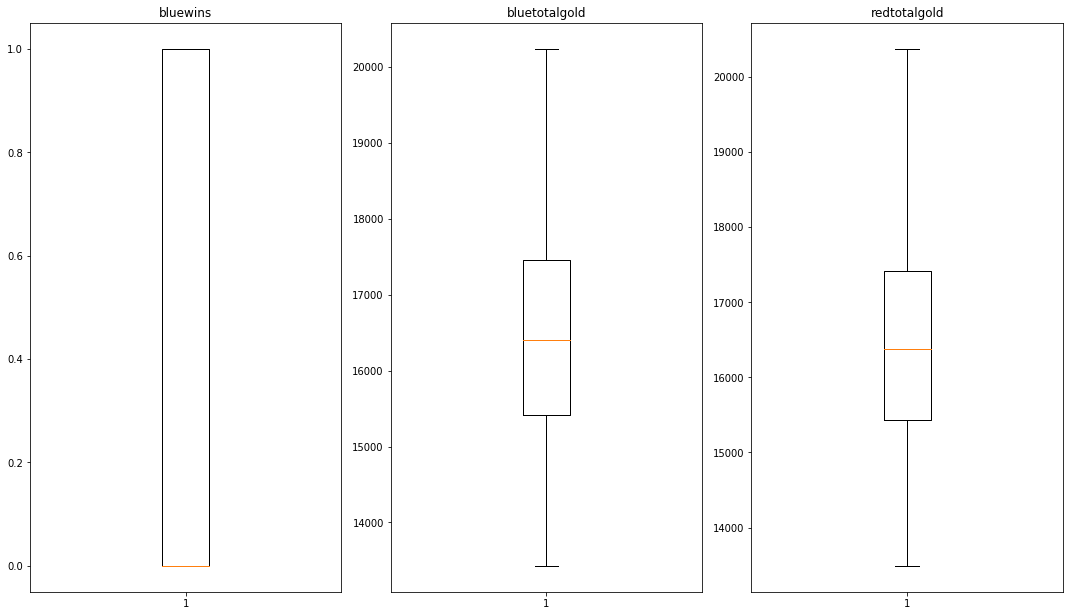

In [100]:
# Plotting feat Distributions
numeric_columns = df_feats1.select_dtypes(['int64', 'float64']).columns
FILL_LIST = []
for cols in df_feats1[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)
plt.figure(figsize=(35, 25))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    try:
        plt.subplot(len(FILL_LIST), 7, i+1)
        plt.boxplot(df_feats1[col])
        plt.title(col)
    except TypeError:
        pass
plt.tight_layout()

### Now that we have limited the impact of univariate outliers, the next step is to investigate multivariate outliers. 

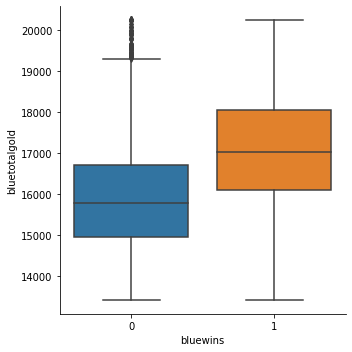

In [101]:
sns.catplot(x="bluewins", y="bluetotalgold", data=df_feats1, kind ='box', whis=1.5)

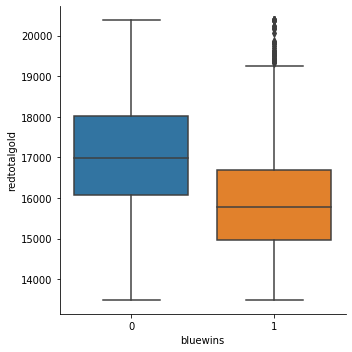

In [102]:
sns.catplot(x="bluewins", y="redtotalgold", data=df_feats1, kind ='box', whis=1.5)

### Depictied by the above graphs we can see that of the games that the blue teams loses, there are some rare games where they earn more gold than normal. There are also games where the blue team wins, but the red team earned more gold within the first 10 minutes of the game. 